## NIR - Xray correlation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner


Distance: 7.3 kpc
--------------
Log(Sig_K) = -0.81 ±  0.09
M_K =  4.68 ± 0.19
P_orb =  0.85 ± 0.23 hr
--------------
Log(Sig_K) = -0.73 ±  0.08
M_K =  4.50 ± 0.18
P_orb =  1.02 ± 0.27 hr


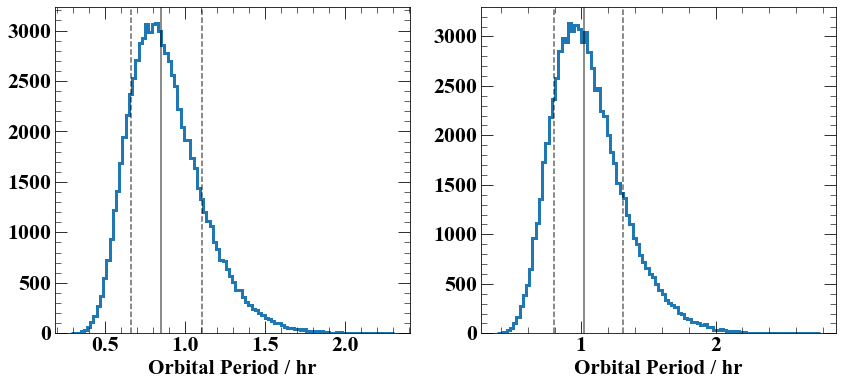

In [2]:
# First epoch
num = 80000

def porb_k(mv,lx):
    si = mv.size
    log_sigma = (mv - np.random.normal(2.66,0.11,si))/(-2.5)
    print("Log(Sig_K) = {0:5.2f} ± {1:5.2f}".format(np.mean(log_sigma),np.std(log_sigma)))
    return (10**(log_sigma)/(lx**0.29))**(1./0.92)


print("\nDistance: 7.3 kpc")
print("--------------")
k = np.random.normal(20.98 - 1.85,0.11,num) ## -1.85, factor from AB to VEGA systems
edd_frac = np.random.uniform(1e-3,5e-3,num)
distance = np.random.normal(7300.,500.,num)


A_v = 3.1 * np.random.normal(0.42,0.05,num)
A_k = 0.11 * A_v
M_k = k - 5.0*np.log10(distance) + 5.0 - A_k

per1 = porb_k(M_k,edd_frac)
print("M_K = {0:5.2f} ±{1:5.2f}".format(np.mean(M_k),np.std(M_k)))
print("P_orb = {0:5.2f} ±{1:5.2f} hr".format(np.median(per1),np.std(per1)))
print("--------------")

k = np.random.normal(18.95,0.10,num) 
A_v = 3.1 * np.random.normal(0.42,0.05,num)
A_k = 0.11 * A_v
M_k = k - 5.0*np.log10(distance) + 5.0 - A_k

per2 = porb_k(M_k,edd_frac)
print("M_K = {0:5.2f} ±{1:5.2f}".format(np.mean(M_k),np.std(M_k)))
print("P_orb = {0:5.2f} ±{1:5.2f} hr".format(np.median(per2),np.std(per2)))


fig = plt.figure(figsize=(14,6))
fig.add_subplot(121)
a = plt.hist(per1,bins=100,histtype='step',lw=3)
plt.xlabel('Orbital Period / hr')
q16 = corner.quantile(per1,.16)
q50 = corner.quantile(per1,.50)
q84 = corner.quantile(per1,.84)
plt.axvline(x=q16,ls='--',color='k',alpha=0.6)
plt.axvline(x=q50,ls='-',color='k',alpha=0.6)
plt.axvline(x=q84,ls='--',color='k',alpha=0.6)
fig.add_subplot(122)
a = plt.hist(per2,bins=100,histtype='step',lw=3)
plt.xlabel('Orbital Period / hr')
q16 = corner.quantile(per2,.16)
q50 = corner.quantile(per2,.50)
q84 = corner.quantile(per2,.84)
plt.axvline(x=q16,ls='--',color='k',alpha=0.6)
plt.axvline(x=q50,ls='-',color='k',alpha=0.6)
plt.axvline(x=q84,ls='--',color='k',alpha=0.6)

### If we change the distance to Nathalie's value (suggested by D. Altamirano)


Distance: 5.0 kpc
--------------
Log(Sig_K) = -1.15 ±  0.11
M_K =  5.52 ± 0.25
P_orb =  0.37 ± 0.12 hr
--------------
Log(Sig_K) = -1.06 ±  0.11
M_K =  5.30 ± 0.24
P_orb =  0.46 ± 0.14 hr
--------------
P_orb =  0.20 ± 0.04 hr


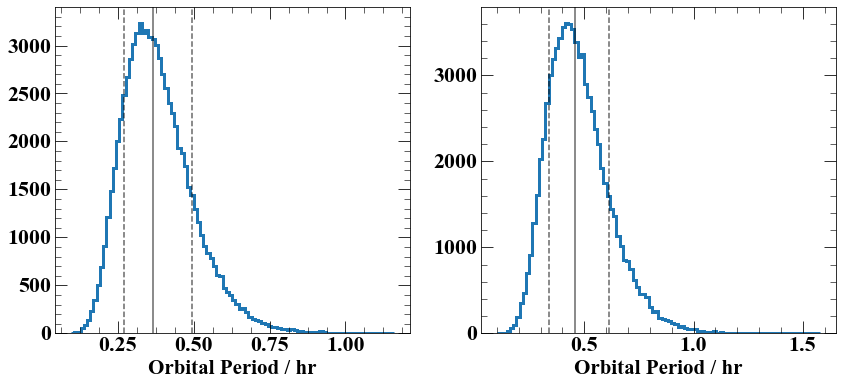

In [3]:
print("\nDistance: 5.0 kpc")
print("--------------")
k = np.random.normal(19.15,0.11,num) #- 1.83
edd_frac = np.random.uniform(1e-3,5e-3,num)
distance = np.random.normal(5000.,500.,num)


A_v = 3.1 * np.random.normal(0.42,0.05,num)
A_k = 0.11 * A_v
M_k = k - 5.0*np.log10(distance) + 5.0 - A_k

per1 = porb_k(M_k,edd_frac)
print("M_K = {0:5.2f} ±{1:5.2f}".format(np.mean(M_k),np.std(M_k)))
print("P_orb = {0:5.2f} ±{1:5.2f} hr".format(np.median(per1),np.std(per1)))

print("--------------")

k = np.random.normal(20.78 - 1.85,0.10,num) # -1.85, factor from AB to VEGA systems
A_v = 3.1 * np.random.normal(0.42,0.05,num)
A_k = 0.11 * A_v
M_k = k - 5.0*np.log10(distance) + 5.0 - A_k

per2 = porb_k(M_k,edd_frac)
print("M_K = {0:5.2f} ±{1:5.2f}".format(np.mean(M_k),np.std(M_k)))
print("P_orb = {0:5.2f} ±{1:5.2f} hr".format(np.median(per2),np.std(per2)))


print("--------------")
avg = np.sqrt((np.random.normal(0.18,0.05,num)**2 + np.random.normal(0.21,0.06,num)**2)/2)
print("P_orb = {0:5.2f} ±{1:5.2f} hr".format(np.mean(avg),np.std(avg)))

fig = plt.figure(figsize=(14,6))
fig.add_subplot(121)
a = plt.hist(per1,bins=100,histtype='step',lw=3)
plt.xlabel('Orbital Period / hr')
q16 = corner.quantile(per1,.16)
q50 = corner.quantile(per1,.50)
q84 = corner.quantile(per1,.84)
plt.axvline(x=q16,ls='--',color='k',alpha=0.6)
plt.axvline(x=q50,ls='-',color='k',alpha=0.6)
plt.axvline(x=q84,ls='--',color='k',alpha=0.6)
fig.add_subplot(122)
a = plt.hist(per2,bins=100,histtype='step',lw=3)
plt.xlabel('Orbital Period / hr')
q16 = corner.quantile(per2,.16)
q50 = corner.quantile(per2,.50)
q84 = corner.quantile(per2,.84)
plt.axvline(x=q16,ls='--',color='k',alpha=0.6)
plt.axvline(x=q50,ls='-',color='k',alpha=0.6)
plt.axvline(x=q84,ls='--',color='k',alpha=0.6)